### Objetivos:

* **Promover a seleção e pré-processamento do conjunto de dados Iris;**
* **Aplicar o algoritmo K-means de <font color='red'>aprendizado não supervisionado</font> ao conjunto de dados, ignorando os rótulos presentes no conjunto de dados;**
* **Selecionar o <font color='blue'>melhor</font> resultado obtido pela aplicação do K-means ao conjunto de dados;**
* **Rotular os clusters (grupos) formados pelo K-means a fim de tornar o conjunto de dados apto ao <font color='green'>aprendizado supervisionado</font>;**
* **Aplicar o algoritmo de <font color='green'>aprendizado supervisionado</font> SVC do modelo SVM aos dados rotulados com o auxílio do K-means.**

**Apesar de conter os rótulos de cada instância, o <font color='blue'>conjunto de dados</font> <font color='red'>Iris</font> será analisado, ignorando esses rótulos, a fim de simular o uso das tarefas de descrição na preparação dos dados para tarefas de previsão.**
<br><br>
**O objetivo é identificar similaridades entre os dados, de maneira a encontrar clusters que tenham alta probabilidade de representar as espécies de flores do conjunto de dados.**

## 1 - Seleção e preparação dos dados

In [1]:
# Importação de algumas bibliotecas.
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns

# Ignora alguns avisos
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Nomes que serão atribuídos às colunas do conj de dados Iris, na mesma ordem em que as colunas aparecem
iris_cols = ['Comprimento das Sépalas', 'Largura das Sépalas', 'Comprimento das Pétalas', 'Largura das Pétalas']

In [3]:
# Desmembramento por ordem: atributos previsores; atributo alvo; rótulos categóricos (setosa, versicolor e virginica);
# descrição do conjunto de dados
X, y, _, y_names, DESCR, _, _, _ = load_iris().values()

In [4]:
# Cria um dataframe apenas com os dados dos atributos previsores
df = pd.DataFrame(X, columns=iris_cols)

In [5]:
# Exibe as 3 primeiras instâncias do dataframe
df.head(3)

,Comprimento das Sépalas,Largura das Sépalas,Comprimento das Pétalas,Largura das Pétalas
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [6]:
# Exibe os índices, nome das colunas, a qntd de instâncias (entradas) do dataframe, qntd de valores não-nulos e tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Comprimento das Sépalas  150 non-null    float64
 1   Largura das Sépalas      150 non-null    float64
 2   Comprimento das Pétalas  150 non-null    float64
 3   Largura das Pétalas      150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Observe que não existe valores nulos na base de dados, já que a quantidade de entradas (150) = quantidade de valores não-nulos (150). Essas informações descartam a necessidade de eliminação de atributos ou instâncias devido à falta de valores, por exemplo.**
<br><br>
**Todos os valores são números com tipo de variável = float64.**
<br><br>
**No entanto, podem ainda existir outros problemas, como a <font color='red'>presença de ruídos</font>, <font color='red'>erros</font>, <font color='red'>diferenças grandes de escala</font>, entre outros.**

In [7]:
# Exibe a qntd de entradas não-nulas (count), média (mean), desvio-padrão (std), valor mínimo (min), 1° quartil (25%),
# 2° quartil (50%), 3° quartil (75%) e valor máximo (max) de cada coluna
df.describe()

,Comprimento das Sépalas,Largura das Sépalas,Comprimento das Pétalas,Largura das Pétalas
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Pode-se notar que as diferenças de escala são pequenas, a ponto de colocar em dúvida se a transformação dos atributos acarretará em mais vantagens ou desvantagens. À princípio, não será feito ajustes de escala.**

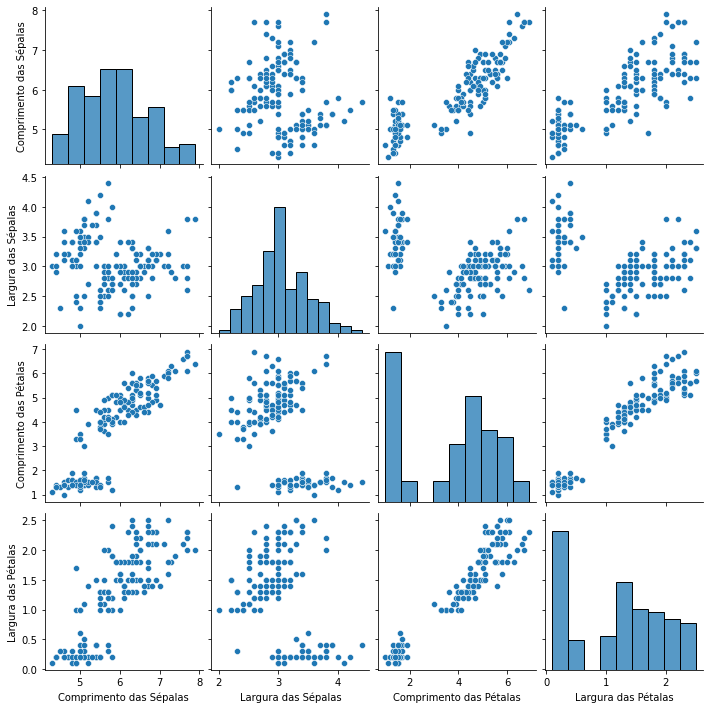

In [8]:
# Distribuição das instâncias para cada par de atributos
sns.pairplot(df);

**Lembrando que, neste ponto do trabalho, não será utilizado o parâmetro <font color='red'>hue</font> com as informações das classificações das espécies para cada instância que separariam, assim, os dados em 3 grupos ('setosa', 'versicolor', 'virginica'). A ideia é fazer de conta que essas informações não existem e, portanto, determiná-las por meio da aplicação do algoritmo K-means.**

**Olhando para a figura acima com gráficos de distribuição das instâncias, é possível notar 2 clusters, pelo menos, em cada um dos gráficos, o que é um bom indicativo de que as características podem ser suficientes para separar os dados por meio de agrupamentos.**

## 2 - Descrição

**Ao invés de selecionar uma combinação de atributos, todos os atributos serão utilizados no treinamento do K-means.**

**Isso ocorre porque o gráfico por pares demonstra existir boa separação de instâncias para, pelo menos, 2 clusters em todas as combinações de atributos, o que não significa necessariamente que esta seja a quantidade mais significativa dentre as possibilidades de agrupamentos.**

**Em se tratando da análise de um conjunto de dados desconhecido, é relevante buscar por várias possibilidades de agrupamento.**

**Para tanto, nessa seção, executa-se o treinamento do K-means para K (n° de grupos/clusters) variando entre 1 e 10 clusters.**

In [9]:
# Importa o algoritmo K-Means, métricas de avaliação e classe para plotagem de gráficos
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

In [10]:
# Armazena o valor do erro quadrático entre as instâncias e o centroide do cluster
erros = []

In [11]:
# Armazena os valores dos índices Silhueta, Davies-Bouldin, Calinski-Harabasz
indices = [[0, 0, 0]]

In [12]:
# n° de clusters (agrupamentos): 0 <= K < 11
K_set = range(1, 11)

In [13]:
# Para cada K em K_set selecionado
for k in K_set:
    
    # Configura e instancia o modelo com o K selecionado
    kmeans = KMeans(n_clusters = k, random_state = 0)
    
    prevs = kmeans.fit_predict(X) # Treina o modelo K-means
    
    # Armazena a soma das distâncias ao quadrado das amostras até o centro do cluster mais próximo
    erros.append(kmeans.inertia_)
    
    # Se K > 1...
    if (k > 1):
        sil = silhouette_score(X, prevs, random_state = 0) # Calcula o índice silhueta
        dav = davies_bouldin_score(X, prevs) # Calcula o índice davies_bouldin
        cal = calinski_harabasz_score(X, prevs) # Calcula o índice calinski_harabasz
        indices = indices + [[sil, dav, cal]] # Adiciona os índices calculados na lista indices

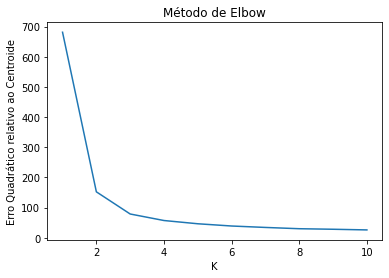

In [14]:
# Plota um gráfico de linha: n° de clusters (K) x Erro quadrático relativo ao centroide
plt.plot(K_set, erros)
plt.xlabel('K')
plt.ylabel('Erro Quadrático relativo ao Centroide')
plt.title('Método de Elbow')
plt.show()

**Visualizando o gráfico acima, é possível selecionar o parâmetro K = 3 se obedecido o método de Elbow (do inglês, Elbow Method). Esse método estabelece como parâmetro K mais adequado o último valor em que houve nítida mudança de inclinação na evolução do gráfico de erro.**
<br><br>
**Percebe-se que, apesar do erro continuar reduzindo conforme mais clusters são formados, pouca diferença é observada entre K = 3 e K = 10.**

In [15]:
# Cria um dataframe com os índices calculados
pd.DataFrame(data=indices, columns=['Silhueta', 'Davies-Bouldin', 'Calinski-Harabasz'], index=K_set)

,Silhueta,Davies-Bouldin,Calinski-Harabasz
1,0.000000,0.000000,0.000000
2,0.681046,0.404293,513.924546
3,0.552819,0.661972,561.627757
4,0.498051,0.780307,530.765808
5,0.493080,0.819384,495.243414
6,0.364834,0.914158,473.850607
7,0.356688,0.971486,449.620571
8,0.361790,0.921902,439.483386
9,0.348858,1.000076,407.151281
10,0.331221,0.997491,390.628484


**Resumo sobre os índices Silhueta, Davies-Bouldin, Calinski-Harabasz**

* **Índice Silhueta --> O valor da silhoueta leva em consideração os valores de distância média de cada ponto para os demais dentro do mesmo cluster (distância intracluster) e a distância entre cada ponto e os outros cluster (distância intercluster). Portanto, a silhueta avalia tanto as instâncias individualmente quanto a totalidade dos clusters em si. Esse índice varia entre -1 e +1, onde -1 significa que diversos pontos deveriam estar vinculados a outro cluster; +1 indica que os pontos provavelmnente estão associados ao cluster ideal; 0 indica que os pontos não possuem clusters definidos**
<br><br>
* **Índice Davies-Bouldin --> Leva em consideração as distâncias dos pontos para os centroides. Quanto menor o valor desse índice, melhor o agrupamento.**
<br><br>
* **Índice Calinski-Harabasz --> Calcula a dispersão entre os pontos de um mesmo cluster (intracluster) e dispersão entre os clusters e o centro do conjunto de dados (interclusters). Escolhe como melhor esquema de agrupamento aquele em que se obtém o maior valor do índice. Quanto maior o valor do índice, mais bem separados e definidos estão os clusters.**

**Pode-se utilizar, então, os índices Silhueta, Davies-Bouldin e Calinski-Harabasz para verificar o grau de similaridade intercluster e dissimilaridade intracluster. Os resultados de cada índice podem ser visualizados no dataframe exibido anteriormente.**

**Avaliando o gráfico intitulado Método de Elbow e os índices calculados e exibidos no dataframe anteriormente, pode-se perceber que:**

* **Os índices Silhueta e Davies-Bouldin <font color='red'>pioram</font> sempre que a quantidade de clusters aumenta;**

* **O Índice Calinski-Harabasz sugere um <font color='green'>melhor agrupamento</font> se 3 clusters forem definidos;**

* **O método de Elbow também sugere um <font color='green'>melhor agrupamento</font> se 3 clusters forem definidos.**

## 3 – Redução de dimensionalidade com PCA

**Na busca pela quantidade adequada de clusters (melhor valor para K), ou de indicadores que apontem para uma definição entre os valores de K = 2 ou K = 3, é executada, a seguir, a redução da dimensão do conjunto de dados utilizando o método PCA (do inglês, Principal Component Analysis - Análise de Componentes Principais).**
<br><br>
**Esse método agrupa os atributos que possuem boa correlação linear. O conjunto de dados, contendo 4 atributos previsores inicialmente, será reduzido para apenas 2 dimensões. Veja a seguir.**

In [16]:
# Importação da classe para o cálculo da PCA
from sklearn.decomposition import PCA

In [17]:
# Configuração e instanciação da classe PCA
pca = PCA(n_components=2, random_state = 0)

In [18]:
# Transformação do conjunto de dados
Xpca = pca.fit_transform(X)

In [19]:
# Valores dos atributos 1 e 2, após a transformação da dimensão de 4 atributos para 2. 
Xpca[0:10]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

In [20]:
# Mediana e desvio-padrão da primeira coluna, da segunda coluna e proporção entre os valores
print('mediana col_1: ', np.median(Xpca[:, 0]), ', mediana col_2: ', np.median(Xpca[:, 1]))
print('media col_1: ', np.mean(Xpca[:, 0]), ', desvio padrão col_1: ', np.std(Xpca[:, 0]))
print('media col_2: ', np.mean(Xpca[:, 1]), ', desvio padrão col_2: ', np.std(Xpca[:, 1]))
print()
print(f'proporção mediana col_1/mediana col_2: {np.abs(np.median(Xpca[:, 0])/np.median(Xpca[:, 1]))}')
print(f'proporção media col_1/media col_2: {np.abs(np.mean(Xpca[:, 0])/np.mean(Xpca[:, 1]))}')
print(f'proporção desvio-padrão col_1/desvio-padrão col_2: {(np.std(Xpca[:, 0])/np.std(Xpca[:, 1]))}')

mediana col_1:  0.5546193436248181 , mediana col_2:  -0.02215677693353567
media col_1:  -2.842170943040401e-15 , desvio padrão col_1:  2.049403188246431
media col_2:  -8.940996091647927e-16 , desvio padrão col_2:  0.4909714278269591

proporção mediana col_1/mediana col_2: 25.03158944500484
proporção media col_1/media col_2: 3.178807947019868
proporção desvio-padrão col_1/desvio-padrão col_2: 4.17418014998774


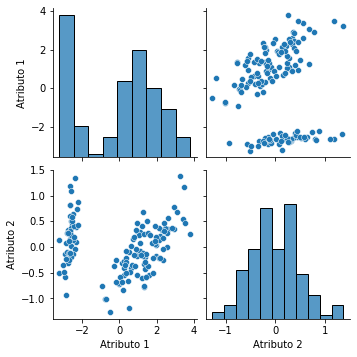

In [21]:
# Plotagem da transformação dos 4 atributos em apenas 2
sns.pairplot(pd.DataFrame(Xpca, columns=['Atributo 1','Atributo 2']));

**É possível visualizar na figura acima uma separação maior das instâncias, mas não se pode afirmar somente a partir da imagem que existam apenas 2 clusters.**
<br><br>
**Se alguma 3a espécie existente apresentar distribuição alongada similar ao grupo de instâncias mais à esquerda (no subplot x = Atributo 1; y = Atributo 2), é possível que 3 clusters existam como sugerem as linhas sobrepostas aos dados, exibidas a seguir.**

<img src="Análise PCA_v2.png" width="500"/>

**Após o PCA, verifica-se que a diferença de escala entre as medianas para os dois atributos 1 e 2 ultrapassa 20 vezes, o que influenciaria, consideravelmente, os algoritmos de agrupamento nesse caso. A escala é ajustada, a seguir, com o método *StandardScaler*().**

## 4 – Descrição dos conjuntos com e sem mudança de escala

In [22]:
# Importação da classe StandardScaler
from sklearn.preprocessing import StandardScaler

In [23]:
# Transformação dos dados xpca
Xps = StandardScaler().fit_transform(Xpca)

In [24]:
# Junção dos arrays com os dados com e sem mudança de escala
XpcaXps = np.concatenate((Xpca, Xps), axis=1)

In [25]:
# Criação de um dataframe com os dados XpcaXps
df_XpcaXps = pd.DataFrame(XpcaXps, columns=['Original 1','Original 2','Balanceado 1','Balanceado 2'])

In [26]:
# Exibe uma análise descritiva dos dados no dataframe
display(df_XpcaXps.describe())

,Original 1,Original 2,Balanceado 1,Balanceado 2
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.814045e-15,-8.948398e-16,-1.043610e-16,-3.626729e-17
std,2.056269e+00,4.926162e-01,1.003350e+00,1.003350e+00
min,-3.223804e+00,-1.265971e+00,-1.573045e+00,-2.578503e+00
25%,-2.530348e+00,-3.254152e-01,-1.234676e+00,-6.627987e-01
50%,5.546193e-01,-2.215678e-02,2.706248e-01,-4.512844e-02
75%,1.550143e+00,3.249152e-01,7.563877e-01,6.617803e-01
max,3.795645e+00,1.374165e+00,1.852074e+00,2.798870e+00


**Aplica-se novamente, na sequência, o bloco de código mais acima (da seção 2), mas para o conjunto de dados transformados pelo PCA e com escala ajustada.**
<br><br>
**A situação melhora um pouco para o índice de silhueta, atingindo um máximo em K = 3, porém, torna-se pouco confiável para o índice de Davies-Bouldin e Calinski-Harabasz, que indica uma melhora constante com aumento de K**
<br><br>
**No entanto, dessa vez, há um desempate, já que o método de Elbow e os valores de silhueta concordam que o parâmetro K = 3 é melhor do que K = 2.**

**<font color='red' size = "4px" face = "Arial">Conclusão</font>: <br><br>É selecionada a quantidade de 3 clusters após a maioria dos testes e indicadores apontarem para a possibilidade de um terceiro grupo levemente sobreposto a outro.**

In [27]:
# Armazena o valor de erro quadrático entre as instâncias e o centroide do cluster
erros = []

# Armazena valores dos índices Silhueta, Davies-Bouldin, Calinski-Harabasz
indices = [[0, 0, 0]]

# n° de clusters (agrupamentos): 0 <= K < 11
K_set = range(1, 11)

In [28]:
# Para cada K em K_set selecionado
for k in K_set:
    
    # Configura e instancia o modelo com o K selecionado
    kmeans = KMeans(n_clusters = k, random_state = 0)
    
    prevs = kmeans.fit_predict(Xps) # Treina o modelo K-means
    
    # Armazena a soma das distâncias ao quadrado das amostras até o centro do cluster mais próximo
    erros.append(kmeans.inertia_)
    
    # Se K > 1...
    if (k > 1):
        sil = silhouette_score(Xps, prevs, random_state = 0) # Calcula o índice silhueta
        dav = davies_bouldin_score(Xps, prevs) # Calcula o índice davies_bouldin
        cal = calinski_harabasz_score(Xps, prevs) # Calcula o índice calinski_harabasz
        indices = indices + [[sil, dav, cal]] # Adiciona os índices calculados na lista indices

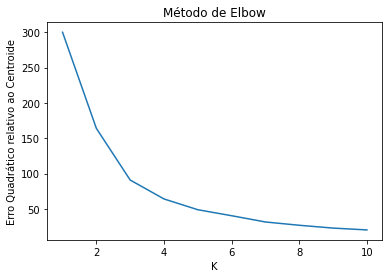

In [29]:
# Plota um gráfico de linha: n° de clusters (K) x Erro quadrático relativo ao centroide
plt.plot(K_set, erros)
plt.xlabel('K')
plt.ylabel('Erro Quadrático relativo ao Centroide')
plt.title('Método de Elbow')
plt.show()

In [30]:
# Cria um dataframe com os índices calculados
pd.DataFrame(data=indices, columns=['Silhueta', 'Davies-Bouldin', 'Calinski-Harabasz'], index=K_set)

,Silhueta,Davies-Bouldin,Calinski-Harabasz
1,0.000000,0.000000,0.000000
2,0.491274,0.834388,122.765158
3,0.504153,0.674591,169.085524
4,0.494409,0.648140,179.024272
5,0.459031,0.700739,186.257398
6,0.449303,0.703462,185.094518
7,0.447514,0.703197,202.919028
8,0.416276,0.732777,206.161076
9,0.425566,0.715002,213.426306
10,0.422737,0.725565,214.281765


## 5 - Rotulação e tarefas de classificação

**Nessa seção, os 3 grupos identificados serão utilizados em tarefas de classificação para tentar prever novas instâncias a partir das características dos grupos conhecidos.**
<br><br>
**Treina-se, novamente, o modelo K-means selecionando, dessa vez, o valor para K = 3.**
<br><br>
**Os dados de treinamento são os mesmos após passar por PCA com ajuste de escala e são utilizados na previsão para rotular cada uma das instâncias e visualizar os atributos por pares com os rótulos previstos.**

In [31]:
# Configura e instancia o modelo KMeans
clusters = KMeans(n_clusters=3, random_state=0)

In [32]:
# Treina o modelo com os dados após PCA e serem ajustados em escala
prevs = clusters.fit_predict(Xps)

In [33]:
# Faz uma cópia do dataframe com os dados originais (X)
df_clusters = df.copy()

In [34]:
# Adiciona a coluna de rótulos previstos
df_clusters['Especie'] = prevs

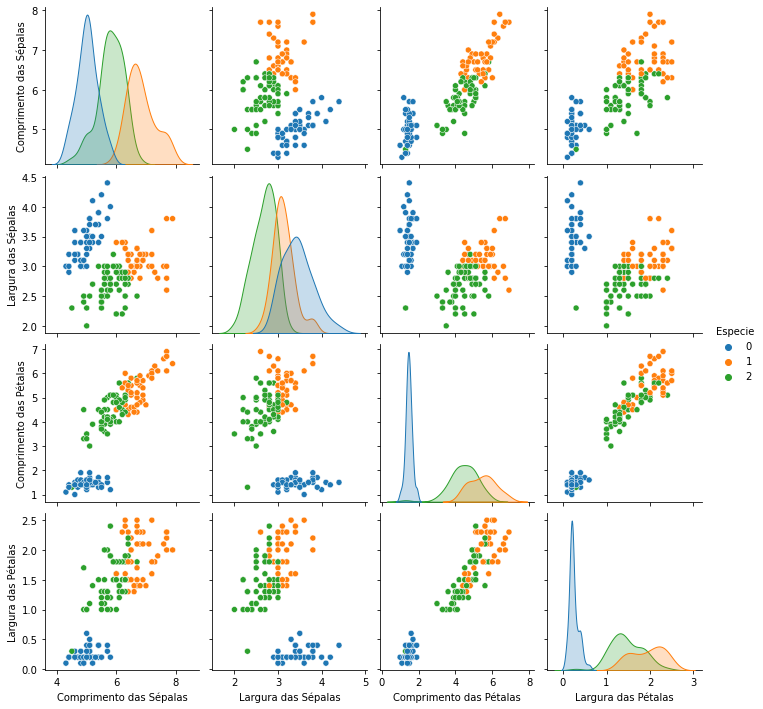

In [35]:
# Exibe um gráfico de pares, com as instâncias separadas por rótulos
sns.pairplot(df_clusters, hue='Especie', palette="tab10");

* **A partir de agora, serão utilizados os mesmos rótulos reais fornecidos pelo conjunto de dados Iris, porém a partir dos grupos formados pelo algoritmo de k-means.**
<br><br>
* **Os nomes não têm importância para o restante do procedimento, apenas os índices (0 a 2) que representam cada agrupamento que deve ser o mesmo da base de dados original (setosa, versicolor e virginica) para que seja possível aferir a precisão da previsão. Por exemplo, o Grupo 1 está mais próximo de onde se encontram as flores da espécie virginica, cujo índice é 2 no conjunto de dados Iris do SciKit-Learn.** 
<br><br>
* **O bloco de código na seção a seguir visa corrigir a inversão na ordem entre as espécies previstas pelo modelo K-means e as que constam na base de dados original, simulando a nomenclatura que seria adotada por um especialista ou a nomeação pela primeira vez dessas espécies.**

## 6 – Rotulação e uso do algoritmo Grid Search

In [36]:
# Rotula os grupos (0 a 2) com os nomes das espécies ('setosa':0, 'virginica':1, 'versicolor':2) 
# na mesma ordem em que aparecem na base Iris - ('setosa':0, 'versicolor':1, 'virginica':2)
df_clusters['Especie'] = df_clusters['Especie'].map({0:'setosa', 1: 'virginica', 2: 'versicolor'})

In [37]:
# Mapeia novamente os rótulos para os índices de acordo com a ordem em que aparecem na base Iris
y_clusters = df_clusters['Especie'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}).values

**Uma vez reunidos os dados devidamente rotulados e na ordem correta, pode-se utilizar técnicas de aprendizado supervisionado para treinar classificadores, como a classe SVC do módulo SVM .**
<br><br>
**Os grupos definidos não são linearmente separáveis já que existem instâncias sobrepostas.**
<br><br>
**Dessa forma, opta-se pelo algoritmo SVC que, diferente do PCA, aumentará ainda mais as dimensões do conjunto de dados na busca por um hiperplano que separe corretamente cada espécie.**
<br><br>
**O algoritmo GridSearchCV é utilizado para facilitar a busca pelos hiperparâmetros do classificador (C, gamma e tipo de kernel), e como critério de avaliação é usado o accuracy score (acurácia).**

In [38]:
# importação das classes necessárias
from sklearn import svm # Módulo SVM do pacote sklearn

# Classe que divide os dados em treino e teste e Grid Search
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score # Classe para métrica de avaliação do modelo

In [39]:
# Separa os dados X e y_clusters em dados de treino e dados de teste
X_treino, X_teste, y_treino, y_teste_clusters = train_test_split(X, y_clusters, random_state=50)

In [40]:
# Separa os dados originais do conjunto Iris (X e y) em dados de treino e dados de teste
_, _, _, y_teste_real = train_test_split(X, y, random_state=50)

In [41]:
Cs = [ 0.001, 0.01, 0.1, 1, 100, 1000 ] # Alguns valores para o hiperparâmetro C
gammas = [ 1e-2, 1e-3, 1e-4, 1e-5 ] # Alguns valores para o hiperparâmetro gamma

# Combinação de hiperparâmetros a serem testados
params_list = [
 {'kernel': ['linear'], 'C': Cs},
 {'kernel': ['poly'], 'C': Cs, 'gamma': gammas},
 {'kernel': ['rbf'], 'C': Cs, 'gamma': gammas}
 ]

**Algumas considerações acerca da configuração do algoritmo SVC:**
<br>
* **Para aumentar as chances de convergência, é utilizado um valor elevado para <font color='red'>max_iter</font>;**
<br><br>
* **Valores altos de gamma foram evitados, pois poderiam facilmente levar à superadaptação do modelo.**

In [42]:
# Configura e instancia o algoritmo SVM para classificação (SVC)
modelo = svm.SVC(probability=True, max_iter=1000000, random_state=0)

In [43]:
# Configura e instancia o algoritmo Grid Search
grid = GridSearchCV(modelo, params_list, scoring='accuracy')

In [44]:
# Treina o algoritmo Grid Search
grid.fit(X_treino, y_treino);

In [45]:
# Exibe os melhor conjunto de hiperparâmetros encontrado
print('Melhores hiperparâmetros: {0}\n'.format(grid.best_params_))

Melhores hiperparâmetros: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}



In [46]:
medias = grid.cv_results_['mean_test_score'] # 54 médias dos testes, uma para cada combinação de hiperparâmetros
ranks = grid.cv_results_['rank_test_score'] # 54 índices de ordenação (rank) dos testes, uma para cada combinação de hiperparams
desvios = grid.cv_results_['std_test_score'] # 54 valores de desvio-padrão, uma para cada combinação de hiperparâmetros
params_set = grid.cv_results_['params'] # 54 combinações de hiperparâmetros

In [47]:
zipped = zip(ranks, medias, desvios, params_set) # Constroi um objeto com diversas tuplas que armazenam cada valor das variáveis
sorted_zip = sorted(zipped, key=lambda x: x[0]) # Ordena as tuplas pelo rank

In [48]:
# Exibe as 5 primeiras linhas da variável sorted_zip
for rank, media, desvio, params in sorted_zip[0:5]:
    print('Ranking: {0:0.4f} - Média: {1:0.04f} - Desvio: {2:0.04f} – hiperparâmetros {3}'.format(rank, media, desvio, params))

Ranking: 1.0000 - Média: 0.9913 - Desvio: 0.0174 – hiperparâmetros {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Ranking: 1.0000 - Média: 0.9913 - Desvio: 0.0174 – hiperparâmetros {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Ranking: 1.0000 - Média: 0.9913 - Desvio: 0.0174 – hiperparâmetros {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Ranking: 4.0000 - Média: 0.9826 - Desvio: 0.0213 – hiperparâmetros {'C': 1, 'kernel': 'linear'}
Ranking: 4.0000 - Média: 0.9826 - Desvio: 0.0213 – hiperparâmetros {'C': 100, 'kernel': 'linear'}


## 7 - Treinamento definitivo do modelo SVM para classificação (SVC)

**A seguir, é mostrado a acurácia do modelo SVM na classificação das instâncias quando comparadas** 

* **aos rótulos definidos pela tarefa de agrupamento (97,37% de acerto);** 
* **aos rótulos reais (86,84% de acerto).**

**Além disso, é avaliada a acurácia entre os clusters formados pelo K-means e os rótulos reais, presentes na base de dados original Iris (84,21%).**

In [49]:
# Configuração definitiva e instanciação do modelo SVM para classificação
model = svm.SVC(C = 100, gamma = 1e-2, kernel = 'rbf', max_iter=1000000, random_state=0)

In [50]:
# Treina o modelo
model.fit(X_treino, y_treino);

In [51]:
# Previsões do modelo
y_svm_prevs = model.predict(X_teste)

In [52]:
# Exibe o valor de acurácia entre os 
# dados de teste previstos pelo K-means (y_teste_clusters) e os previstos pelo SVM (y_svm_prevs);
# dados de teste originais (y_teste_originais) e os previstos pelo SVM (y_svm_prevs);
# dados de teste originais (y_teste_originais) e os previstos pelo K-means(y_teste_clusters)
display(
 round(accuracy_score(y_teste_clusters, y_svm_prevs) * 100, 2),
 round(accuracy_score(y_teste_real, y_svm_prevs) * 100, 2),
 round(accuracy_score(y_teste_real, y_teste_clusters)* 100, 2) 
)

97.37

86.84

84.21

**<font color='red' size = "4px" face = "Arial">Conclusão</font>: <br><br>**

1. **Dadas as circunstâncias em que fora simulada para este trabalho, desconsiderando a existência de rótulos no conjunto de dados original, a acurácia na previsão do modelo SVM para as instâncias agrupadas pelo algoritmo K-means é bastante elevada (97.37% de acerto).**
<br><br>
2. **A acurácia entre os rótulos reais, presentes no conjunto de dados Iris, e os rótulos previstos pelo SVM é mais baixa (86.84% de acerto), devido a algumas instâncias agrupadas de forma equivoca pelo modelo K-means e presentes entre os dados usados para treinar o modelo SVM. A presença desses dados agrupados e classificados de forma equivocada entre os dados de treinamento do modelo SVM levou a um erro maior nas previsões do modelo.**
<br><br>
3. **A acurácia entre os rótulos reais e os agrupados pelo modelo K-means é menor ainda (84.21% de acerto), quando comparada as acurácias da 1a e 2a situação. O valor baixo de acurácia também tem a ver com os agrupamentos equivocados feitos pelo modelo K-means, quando comparado aos agrupamentos dos dados originais que podem ser visualizados no gráfico de pares.**